# PRML 1.4 次元の呪い

---

## 概論

### 本節の目的

* 高次元空間では様々な困難が生じることを説明する。
* 3次元空間で形成された幾何的直感は高次元空間で通用しないことを注意させる。

### サマリ

高次元空間で生じる困難のことを次元の呪いと呼ぶ。

* 生じる困難
    * 空間を埋めるために膨大なデータが必要になる
        * 膨大なデータを集めることは困難なので、現実的にはスカスカな空間が生まれる
        * スカスカな空間における予測性能は低くなる
    * 捉えるべきパターンが超複雑になる
        * 超複雑なパターンを捉えるためには超複雑なモデルを仮定する必要がある
        * 計算量が爆発するので、現実的には超複雑なモデルは仮定できない
    * データ点同士の距離に差がつかなくなる (球面集中現象)
        * 機械学習は暗に「入力値が似ているデータ点は目標値も似ている」という仮定を前提として置いている
        * 距離に差がつかないと前提が成り立たないので、機械学習を適用できない
* 困難を緩和できる場合
    * 見かけ上の次元数は高いが実質的な次元数は低い場合
        * 次元削減などの手法により緩和できる
    * 入力値に対して目標値が滑らかに変化する場合
        * 内挿などの手法により緩和できる

---

## 球面集中現象

高次元空間では、データ点同士の距離に差がつかなくなる。

$D$ 次元空間における、あるデータ点 $Q$ から最も遠い点 $P_{\text{max}}$ と最も近い点 $P_{\text{min}}$ を考える。<br>
線分 $QP_{\text{max}}$ の長さを $r$、線分 $QP_{\text{min}}$ の長さを $r - \epsilon$ と置く。<br>
データ点が一様に分布していると仮定するとデータ点の個数は体積に比例するから、<br>
距離 $r - \epsilon$ から $r$ の間に存在する$Q$ 周囲のデータ点の割合は

$$
\frac{V_D(r) - V_D(r - \epsilon)}{V_D(r)}
$$

と表せる。ただし、$V_D(r)$ は $D$ 次元空間における半径 $r$ の超球面の体積を表す。

ここで、例として $r = 1$ に固定し $D$ を変化させたときの割合をグラフ化する。

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
v = lambda d, r: np.pi ** (d / 2) / np.math.gamma(d / 2 + 1) * (r ** d)
v_ratio = lambda e, d: (v(d, 1) - v(d, 1 - e)) / v(d, 1)

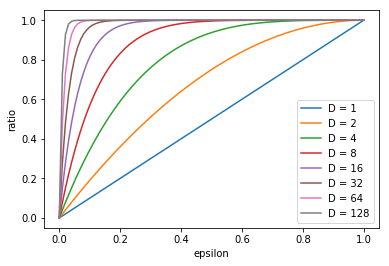

In [45]:
for d in [1, 2, 4, 8, 16, 32, 64, 128]:
    plt.plot(np.linspace(0, 1, 100), np.vectorize(lambda e: v_ratio(e, d))(np.linspace(0, 1, 100)), label = "D = {0}".format(d))
plt.xlabel("epsilon")
plt.ylabel("ratio")
plt.legend()
plt.show()

この例から、大きな $D$ では小さな $\epsilon$ の中にほぼすべてのデータ点が存在することがわかる。<br>
すなわち、最も遠い点 $P_{\text{max}}$ も最も近い点 $P_{\text{min}}$ も、平均的にはほぼ同じ距離のところに存在することを表している。<br>
これは、高次元空間においてはデータ点同士の距離に差がつかなくなることを意味する。<br>
ここでは一様分布を仮定したが、他の分布でも同様の現象が起こることがわかっている。

## 高次元空間におけるガウス分布の振る舞い

高次元空間において、ガウス分布の確率質量の大部分は確率密度が最も高い中心から離れたところに存在する。

以下は、平均 $0$・分散 $1$ のガウス分布における、中心から距離 $r$ の位置にある確率密度をグラフ化したもの。<br>
次元が高くなるにつれて、中心から離れたところに確率密度のピークが来る。<br>
このことから、高次元空間におけるガウス分布の確率質量の大部分は、ある特定の半径における薄皮の中に存在することがわかる。

In [34]:
s = lambda d, r: 2 * (np.pi ** ((d + 1) / 2)) / np.math.gamma((d + 1) / 2)
p = lambda d, r, sigma: s(d, r) * (r ** (d - 1)) / ((2 * np.pi * (sigma ** 2)) ** (d / 2)) * np.exp(-1 * (r ** 2) / (2 * (sigma ** 2)))

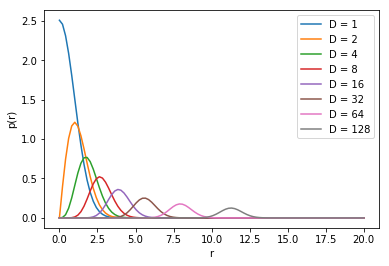

In [46]:
for d in [1, 2, 4, 8, 16, 32, 64, 128]:
    plt.plot(np.linspace(0, 20, 100), np.vectorize(lambda r: p(d, r, 1))(np.linspace(0, 20, 100)), label = "D = {0}".format(d))
plt.xlabel("r")
plt.ylabel("p(r)")
plt.legend()
plt.show()

## 参考文献

* 球面集中現象の直感的な理解
    * [次元の呪い、あるいは「サクサクメロンパン問題」- 蛍光ペンの交差点\[別館\]](http://windfall.hatenablog.com/entry/2015/07/02/084623)
* 球面集中現象というキーワードを知ったページ
    * [次元の呪い - 朱鷺の杜](http://ibisforest.org/index.php?%E6%AC%A1%E5%85%83%E3%81%AE%E5%91%AA%E3%81%84)
* 機械学習の文脈における球面集中現象の解釈
    * [次元の呪いについて - Qiita](https://qiita.com/tn1031/items/96e7131cd41df1aebe85)
* 超球面の体積と表面積の求め方
    * [超球面 - Wikipedia](https://ja.wikipedia.org/wiki/%E8%B6%85%E7%90%83%E9%9D%A2#%E4%BD%93%E7%A9%8D%E3%81%A8%E8%A1%A8%E9%9D%A2%E7%A9%8D)

---

<div id="disqus_thread"></div>
<script>
var disqus_config = function () {
this.page.url = "http://nbviewer.jupyter.org/github/mtmaru/prml/blob/master/PRML_1_4_0.ipynb";
this.page.identifier = this.page.url;
};
(function() { // DON'T EDIT BELOW THIS LINE
var d = document, s = d.createElement('script');
s.src = 'https://prml-mtmaru.disqus.com/embed.js';
s.setAttribute('data-timestamp', +new Date());
(d.head || d.body).appendChild(s);
})();
</script>